In [ ]:
!pip install kosmos-2



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.9 MB/s eta 0:00:00
  Created wheel for deepspeed: filename=deepspeed-0.12.6-py3-none-any.whl size=1306709 sha256=c10641c218ac613b17f81d79e748781d0d8e9f6c436da52ace601

In [ ]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq


model = AutoModelForVision2Seq.from_pretrained("microsoft/kosmos-2-patch14-224")
processor = AutoProcessor.from_pretrained("microsoft/kosmos-2-patch14-224")

prompt = "<grounding>An image of"

url = "https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/main/snowman.png"
image = Image.open(requests.get(url, stream=True).raw)

# The original Kosmos-2 demo saves the image first then reload it. For some images, this will give slightly different image input and change the generation outputs.
image.save("new_image.jpg")
image = Image.open("new_image.jpg")

inputs = processor(text=prompt, images=image, return_tensors="pt")

generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Specify `cleanup_and_extract=False` in order to see the raw model generation.
processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)

print(processed_text)
# `<grounding> An image of<phrase> a snowman</phrase><object><patch_index_0044><patch_index_0863></object> warming himself by<phrase> a fire</phrase><object><patch_index_0005><patch_index_0911></object>.`

# By default, the generated  text is cleanup and the entities are extracted.
processed_text, entities = processor.post_process_generation(generated_text)

print(processed_text)
# `An image of a snowman warming himself by a fire.`

print(entities)
# `[('a snowman', (12, 21), [(0.390625, 0.046875, 0.984375, 0.828125)]), ('a fire', (41, 47), [(0.171875, 0.015625, 0.484375, 0.890625)])]`


config.json:   0%|          | 0.00/4.45k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.66G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/534 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/191k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.70M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<grounding> An image of<phrase> a snowman</phrase><object><patch_index_0044><patch_index_0863></object> warming himself by<phrase> a fire</phrase><object><patch_index_0005><patch_index_0911></object>.
An image of a snowman warming himself by a fire.
[('a snowman', (12, 21), [(0.390625, 0.046875, 0.984375, 0.828125)]), ('a fire', (41, 47), [(0.171875, 0.015625, 0.484375, 0.890625)])]


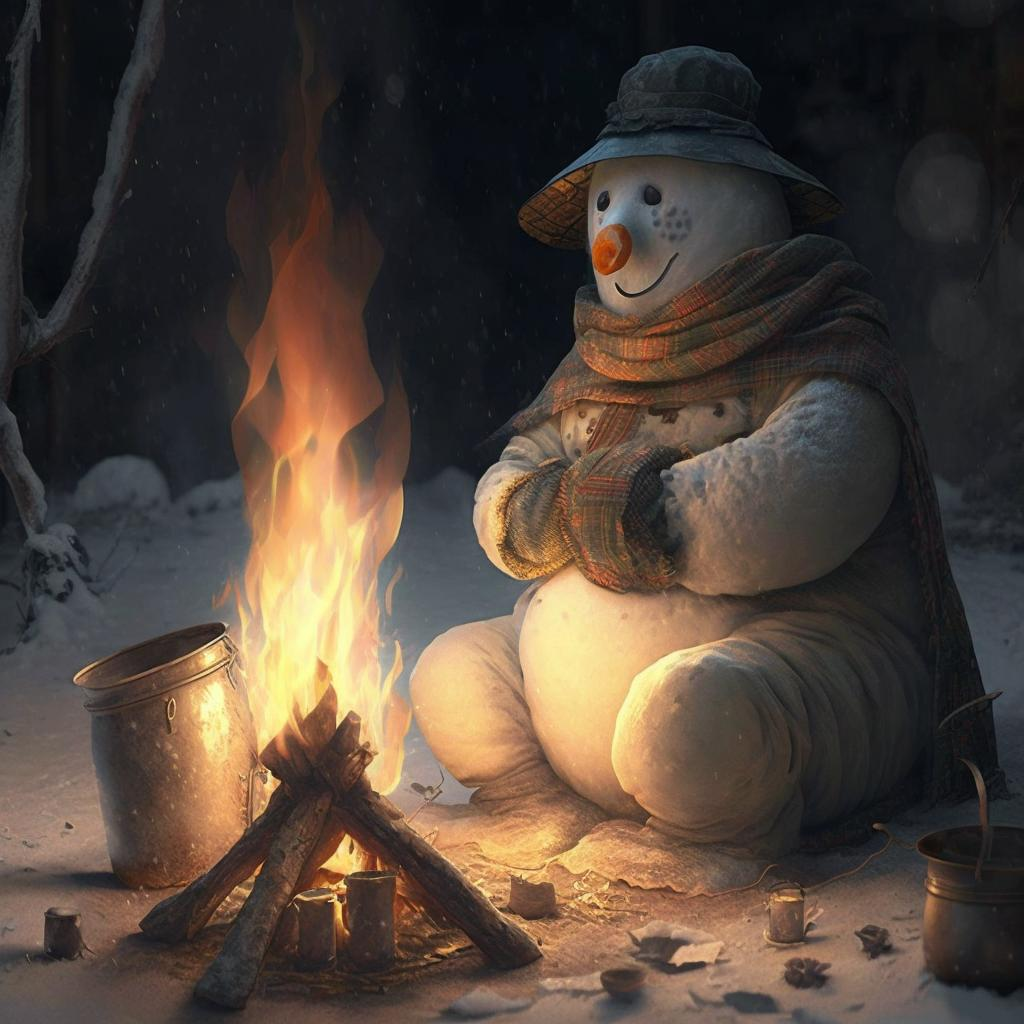

In [ ]:
image

In [ ]:
processed_text

'An image of a snowman warming himself by a fire.'